# Notebook to compute ocean heat content

Call to the reader and retrieve data

In [1]:
import numpy as np
from aqua import Reader
from aqua.graphics import plot_timeseries
from ocean_heat_functions_notebook import compute_net_surface_fluxes, plot_time_series, plot_difference

In [2]:
model="IFS-NEMO"
exp="ssp370"
source="lra-r100-monthly"
startdate = "19900101"
enddate = "20020101"
reader= Reader(model=model, exp=exp, source=source)#, startdate=startdate, enddate=enddate)
data = reader.retrieve(var=['mslhf','msnlwrf','msnswrf','msshf',"avg_tos", "avg_hc700m"])
data

2024-03-07 18:25:18 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-03-07 18:25:18 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment ssp370, source lra-r100-monthly


<xarray.Dataset> Size: 236MB
Dimensions:     (time: 76, lat: 180, lon: 360)
Coordinates:
  * time        (time) datetime64[ns] 608B 2020-01-01 2020-02-01 ... 2026-04-01
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
Data variables:
    mslhf       (time, lat, lon) float64 39MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msnlwrf     (time, lat, lon) float64 39MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msnswrf     (time, lat, lon) float64 39MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msshf       (time, lat, lon) float64 39MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_tos     (time, lat, lon) float64 39MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_hc700m  (time, lat, lon) float64 39MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-03-07 18:25:24 AQUA💧: Retrieved from IFS-NEMO_ssp370_lra...

Net surface fluxes at the ocean surface are:
mslhf, msnlwrf, msnswrf, msshf
If integrated over the whole ocean surface, they should be equal to the net heat flux at the ocean surface (hfds)
or the heat/sources/sinks in the ocean (hfds - hfss)

In [3]:
#computes net surface fluxes at the ocean surface including land sea mask
net_surface_fluxes, mask = compute_net_surface_fluxes(data)
# compute the time series of the net surface fluxes
net_surface_fluxes = reader.fldmean(net_surface_fluxes)


In [4]:
# get the heat content of the 700m ocean layer and perform spatial averaging
avg_hc700m = data['avg_hc700m']
avg_hc700m=reader.fldmean(avg_hc700m)
# compute time derivative of the heat content
time_diff = np.diff(avg_hc700m.time.values, axis=0) / np.timedelta64(1, 's')
avg_hc_time_derivative = np.diff(avg_hc700m, axis=0) / time_diff


In [7]:
title_args = {'model': model, 'exp': exp, 'source': source}
plot_dir = "./pdf"
#plot_time_series(net_surface_fluxes, avg_hc_time_derivative, title_args, var1_label="Net OSF [W m**2]",  var2_label="HC700m time derivative [W m**2]", outdir=plot_dir)

OSError: [Errno 122] Disk quota exceeded

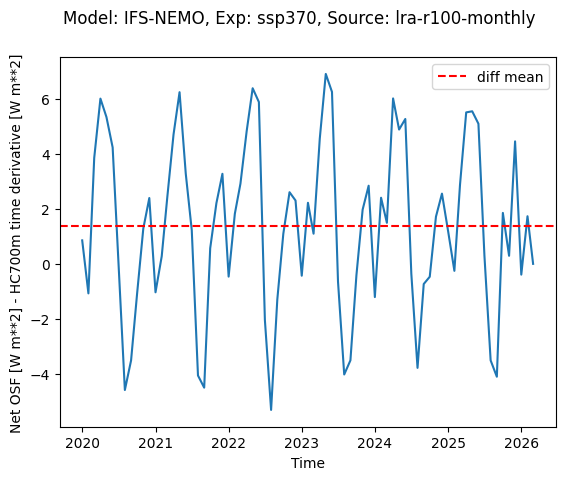

In [8]:
plot_difference(net_surface_fluxes, avg_hc_time_derivative, title_args, var1_label="Net OSF [W m**2]",  var2_label="HC700m time derivative [W m**2]", outdir=plot_dir)
                    